In [1]:
# EDA on Boom Bike data
## Load the Boom BIKE data from CSV
## Read the data
## filter out un-necessary columns

In [2]:
import numpy as np
import pandas as pd
boombike = pd.read_csv("day.csv")
boombike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3]:
## Understamd the variables
## delete unwanted columns
## as mentioned on the Introduction part of the case study, following columns can be deleted
### casual, registered, instant, holiday

In [4]:
bb = boombike.drop(['instant', 'casual', 'registered', 'holiday', 'atemp'], axis=1)

In [5]:
bb.shape

(730, 11)

In [6]:
## get the column information
bb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   dteday      730 non-null    object 
 1   season      730 non-null    int64  
 2   yr          730 non-null    int64  
 3   mnth        730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   hum         730 non-null    float64
 9   windspeed   730 non-null    float64
 10  cnt         730 non-null    int64  
dtypes: float64(3), int64(7), object(1)
memory usage: 62.9+ KB


In [7]:
## get the median, mode and other stats using describe
bb.describe()

,season,yr,mnth,weekday,workingday,weathersit,temp,hum,windspeed,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,2.498630,0.500000,6.526027,2.997260,0.683562,1.394521,20.319259,62.765175,12.763620,4508.006849
std,1.110184,0.500343,3.450215,2.006161,0.465405,0.544807,7.506729,14.237589,5.195841,1936.011647
min,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,2.424346,0.000000,1.500244,22.000000
25%,2.000000,0.000000,4.000000,1.000000,0.000000,1.000000,13.811885,52.000000,9.041650,3169.750000
50%,3.000000,0.500000,7.000000,3.000000,1.000000,1.000000,20.465826,62.625000,12.125325,4548.500000
75%,3.000000,1.000000,10.000000,5.000000,1.000000,2.000000,26.880615,72.989575,15.625589,5966.000000
max,4.000000,1.000000,12.000000,6.000000,1.000000,3.000000,35.328347,97.250000,34.000021,8714.000000


In [8]:
# Visualizing the relation using EDA plots

In [9]:
import matplotlib.pyplot as plt 
import seaborn as sns

<AxesSubplot:xlabel='cnt', ylabel='temp'>

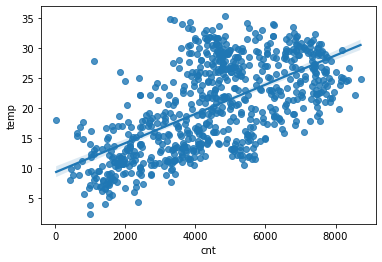

In [10]:
sns.regplot(x='cnt', y='temp', data=bb)

<Figure size 1440x864 with 0 Axes>

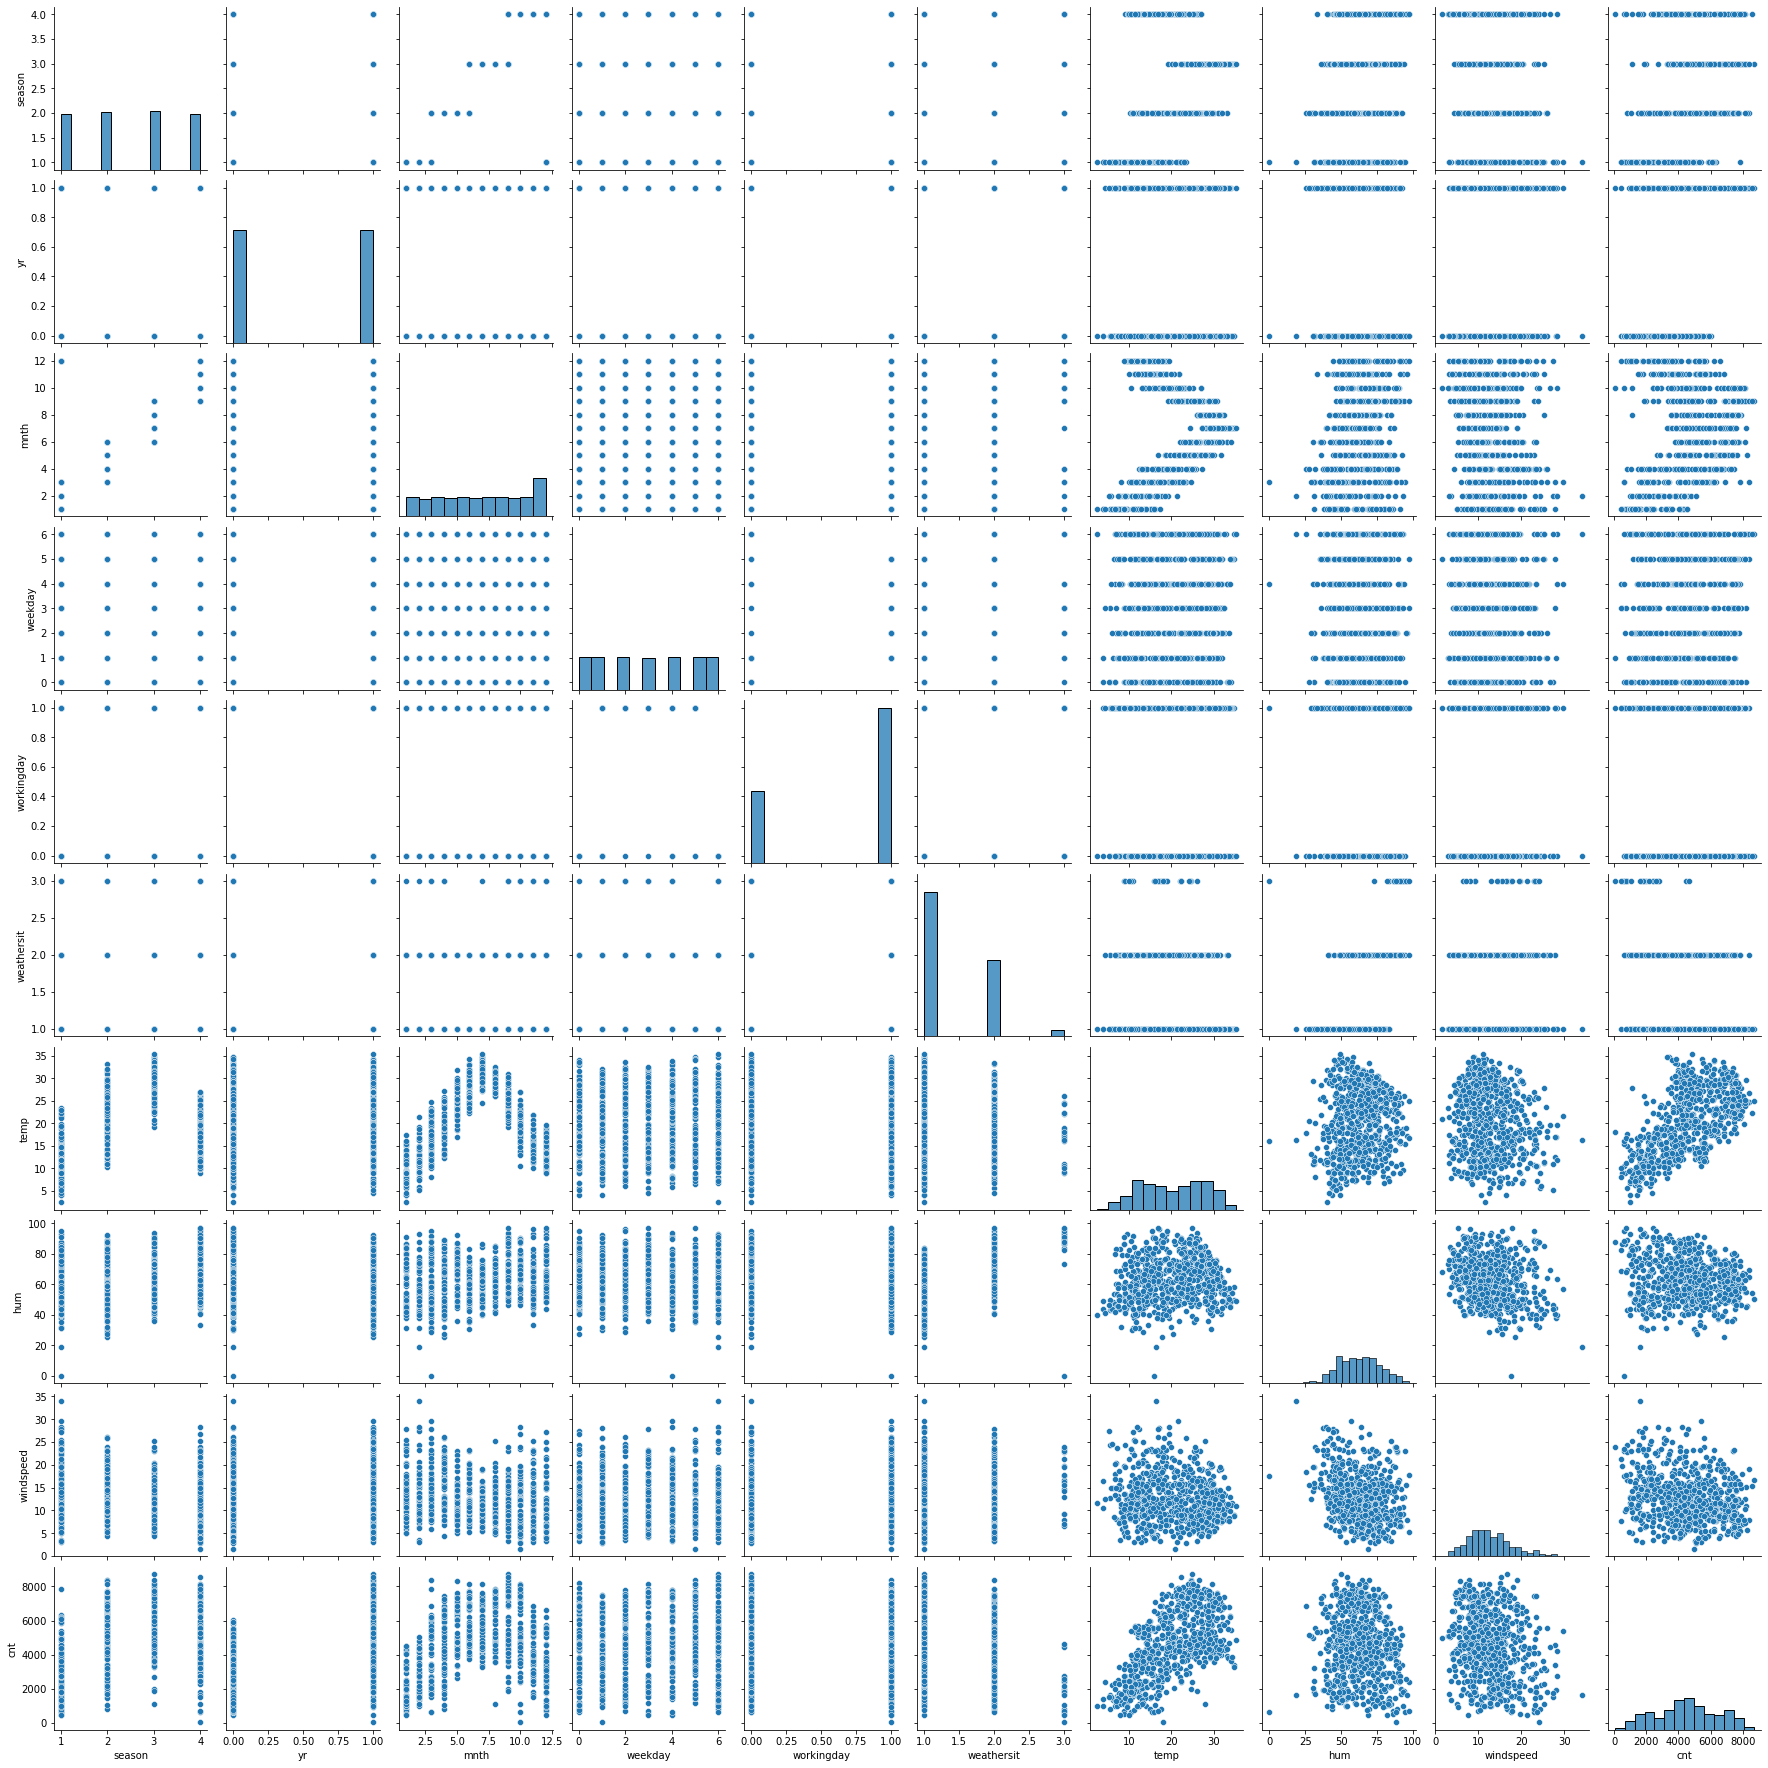

In [11]:
plt.figure(figsize=(20, 12))
sns.pairplot(bb)

<AxesSubplot:>

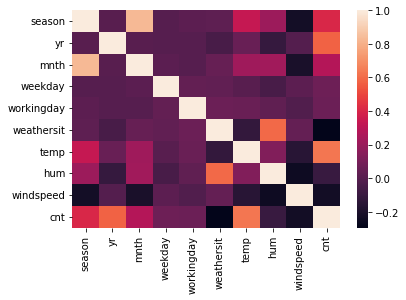

In [12]:
sns.heatmap(bb.corr())

In [13]:
# From Pairplot and Heatmap
# cnt is most co-related with temp
## note cnt is our target variable

In [14]:
bb.corr()

,season,yr,mnth,weekday,workingday,weathersit,temp,hum,windspeed,cnt
season,1.000000e+00,-3.279074e-16,8.310321e-01,-0.003081,0.013762,0.021306,0.333361,0.208220,-0.229607,0.404584
yr,-3.279074e-16,1.000000e+00,-5.162656e-16,-0.005466,-0.002945,-0.050322,0.048789,-0.112547,-0.011624,0.569728
mnth,8.310321e-01,-5.162656e-16,1.000000e+00,0.009523,-0.004688,0.045613,0.219083,0.224937,-0.208013,0.278191
weekday,-3.081198e-03,-5.466369e-03,9.522969e-03,1.000000,0.035800,0.031112,-0.000168,-0.052290,0.014283,0.067534
workingday,1.376178e-02,-2.945396e-03,-4.687953e-03,0.035800,1.000000,0.060236,0.053470,0.023202,-0.018666,0.062542
weathersit,2.130636e-02,-5.032247e-02,4.561335e-02,0.031112,0.060236,1.000000,-0.119503,0.590277,0.039769,-0.295929
temp,3.333607e-01,4.878919e-02,2.190833e-01,-0.000168,0.053470,-0.119503,1.000000,0.128565,-0.158186,0.627044
hum,2.082196e-01,-1.125471e-01,2.249368e-01,-0.052290,0.023202,0.590277,0.128565,1.000000,-0.248506,-0.098543
windspeed,-2.296069e-01,-1.162435e-02,-2.080131e-01,0.014283,-0.018666,0.039769,-0.158186,-0.248506,1.000000,-0.235132
cnt,4.045838e-01,5.697285e-01,2.781909e-01,0.067534,0.062542,-0.295929,0.627044,-0.098543,-0.235132,1.000000


In [15]:
## find the outliers in the given dataset
## remove the outliers

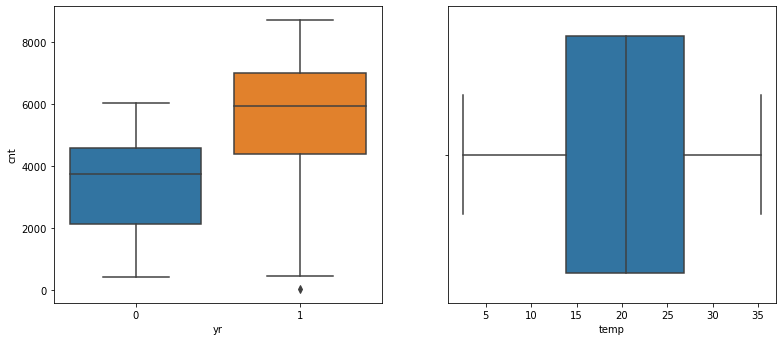

In [16]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'yr', y = 'cnt', data = bb)
plt.subplot(2,3,2)
sns.boxplot(x = 'temp', data = bb)
plt.show()

In [25]:
# Create Dummy Variables
# Dummy variables will be created for Year : inorder split 2018 and 2019
# Dummy variables for seasons : 
##		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
##		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
##		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
##		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

In [17]:
bb['year'] = pd.DatetimeIndex(bb['dteday']).year
bb['month'] = pd.DatetimeIndex(bb['dteday']).month
bb

,dteday,season,yr,mnth,weekday,workingday,weathersit,temp,hum,windspeed,cnt,year,month
0,01-01-2018,1,0,1,6,0,2,14.110847,80.5833,10.749882,985,2018,1
1,02-01-2018,1,0,1,0,0,2,14.902598,69.6087,16.652113,801,2018,2
2,03-01-2018,1,0,1,1,1,1,8.050924,43.7273,16.636703,1349,2018,3
3,04-01-2018,1,0,1,2,1,1,8.200000,59.0435,10.739832,1562,2018,4
4,05-01-2018,1,0,1,3,1,1,9.305237,43.6957,12.522300,1600,2018,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,27-12-2019,1,1,12,4,1,2,10.420847,65.2917,23.458911,2114,2019,12
726,28-12-2019,1,1,12,5,1,2,10.386653,59.0000,10.416557,3095,2019,12
727,29-12-2019,1,1,12,6,0,2,10.386653,75.2917,8.333661,1341,2019,12
728,30-12-2019,1,1,12,0,0,1,10.489153,48.3333,23.500518,1796,2019,12


In [18]:
## after the date split up, column dteday is not required
bb1 = bb.drop(['dteday'], axis=1)

In [19]:
status = pd.get_dummies(bb['year'])
status.head()
bb2 = pd.concat([bb1, status], axis = 1)

In [20]:
bb3 = bb2.drop(['year'], axis=1)

In [21]:
status = pd.get_dummies(bb3['season'])
status.head()
bb4 = pd.concat([bb3, status], axis = 1)
bb4

,season,yr,mnth,weekday,workingday,weathersit,temp,hum,windspeed,cnt,month,2018,2019,1,2,3,4
0,1,0,1,6,0,2,14.110847,80.5833,10.749882,985,1,1,0,1,0,0,0
1,1,0,1,0,0,2,14.902598,69.6087,16.652113,801,2,1,0,1,0,0,0
2,1,0,1,1,1,1,8.050924,43.7273,16.636703,1349,3,1,0,1,0,0,0
3,1,0,1,2,1,1,8.200000,59.0435,10.739832,1562,4,1,0,1,0,0,0
4,1,0,1,3,1,1,9.305237,43.6957,12.522300,1600,5,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,1,1,12,4,1,2,10.420847,65.2917,23.458911,2114,12,0,1,1,0,0,0
726,1,1,12,5,1,2,10.386653,59.0000,10.416557,3095,12,0,1,1,0,0,0
727,1,1,12,6,0,2,10.386653,75.2917,8.333661,1341,12,0,1,1,0,0,0
728,1,1,12,0,0,1,10.489153,48.3333,23.500518,1796,12,0,1,1,0,0,0


In [24]:
#+ weathersit : 
##		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
##		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
##		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
##		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
bb5 = bb4.drop(['season'], axis=1)
bb5 = bb5.drop(['month'], axis=1)
bb5 = bb5.drop(['yr'], axis=1)
bb5

,mnth,weekday,workingday,weathersit,temp,hum,windspeed,cnt,2018,2019,1,2,3,4
0,1,6,0,2,14.110847,80.5833,10.749882,985,1,0,1,0,0,0
1,1,0,0,2,14.902598,69.6087,16.652113,801,1,0,1,0,0,0
2,1,1,1,1,8.050924,43.7273,16.636703,1349,1,0,1,0,0,0
3,1,2,1,1,8.200000,59.0435,10.739832,1562,1,0,1,0,0,0
4,1,3,1,1,9.305237,43.6957,12.522300,1600,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,12,4,1,2,10.420847,65.2917,23.458911,2114,0,1,1,0,0,0
726,12,5,1,2,10.386653,59.0000,10.416557,3095,0,1,1,0,0,0
727,12,6,0,2,10.386653,75.2917,8.333661,1341,0,1,1,0,0,0
728,12,0,0,1,10.489153,48.3333,23.500518,1796,0,1,1,0,0,0


In [45]:
bb5["2018"].astype(str).astype(int)
bb5.info()

KeyError: '2018'

In [26]:
## create Train and test sets
### variable train-test-Split
from sklearn.model_selection import train_test_split

X = bb5['cnt']
y = bb5['temp']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 100)
X_train.shape

(510,)

In [27]:
X_train.head()

653    7534
576    7216
426    4066
728    1796
482    4220
Name: cnt, dtype: int64

In [28]:
y_train.head()

653    19.201653
576    29.246653
426    16.980847
728    10.489153
482    15.443347
Name: temp, dtype: float64

In [29]:
### Build Linear Model

In [30]:
import statsmodels.api as sm

In [31]:
# Add a constant to get an intercept
X_train_sm = sm.add_constant(X_train)

# Fit the resgression line using 'OLS'
lr = sm.OLS(y_train, X_train_sm).fit()

C:\Users\vvenugop\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [32]:
lr.params

const    9.112412
cnt      0.002450
dtype: float64

In [33]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   temp   R-squared:                       0.414
Model:                            OLS   Adj. R-squared:                  0.413
Method:                 Least Squares   F-statistic:                     359.1
Date:                Wed, 14 Sep 2022   Prob (F-statistic):           5.80e-61
Time:                        21:13:14   Log-Likelihood:                -1609.7
No. Observations:                 510   AIC:                             3223.
Df Residuals:                     508   BIC:                             3232.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.1124      0.632     14.409      0.000       7.870      10.355
cnt            0.0024      0.000     18.949      0.000       0.002       0.003
==============================================================================
Omnibus:                       21.100   Durbin-Watson:                   2.179
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               19.109
Skew:                           0.413   Prob(JB):                     7.09e-05
Kurtosis:                       2.534   Cond. No.                     1.23e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.23e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [35]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(bb5, train_size = 0.7, test_size = 0.3, random_state = 100)

In [36]:
from sklearn.preprocessing import MinMaxScaler

In [37]:
scaler = MinMaxScaler()

In [47]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['temp', 'weathersit', 'cnt']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

C:\Users\vvenugop\Anaconda3\lib\site-packages\pandas\core\frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


In [48]:
df_train.head()


,mnth,weekday,workingday,weathersit,temp,hum,windspeed,cnt,2018,2019,1,2,3,4
653,10,2,1,0.0,0.509887,55.8333,12.208807,0.864243,0,1,0,0,0,1
576,7,2,1,0.0,0.815169,70.4167,11.083475,0.827658,0,1,0,0,1,0
426,3,6,0,0.5,0.442393,62.1250,10.792293,0.465255,0,1,1,0,0,0
728,12,0,0,0.0,0.245101,48.3333,23.500518,0.204096,0,1,1,0,0,0
482,4,6,0,0.5,0.395666,48.9583,8.708325,0.482973,0,1,0,1,0,0


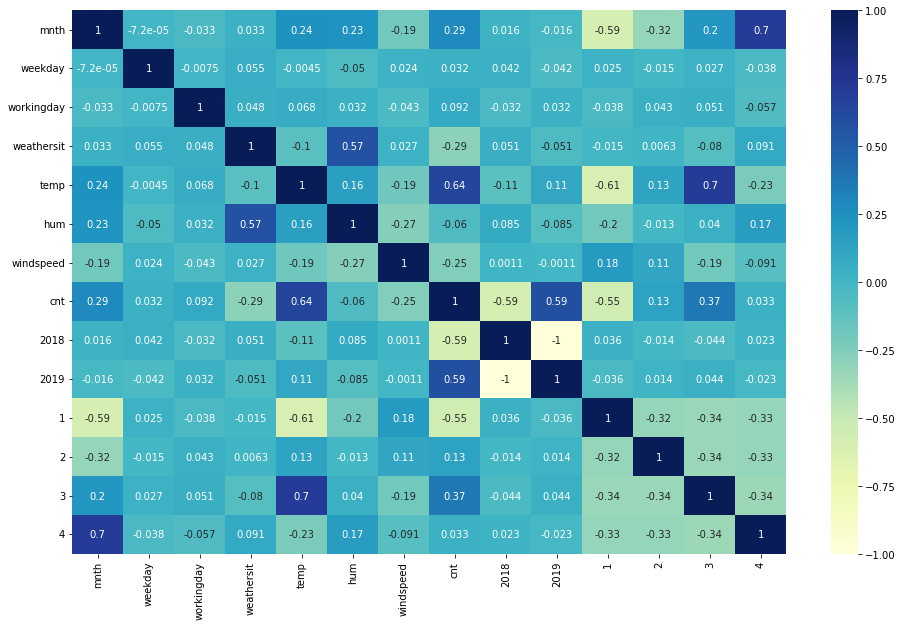

In [49]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (16, 10))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

In [50]:
df_train.describe()

,mnth,weekday,workingday,weathersit,temp,hum,windspeed,cnt,2018,2019,1,2,3,4
count,510.000000,510.000000,510.000000,510.00000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000
mean,6.549020,2.990196,0.676471,0.20098,0.537262,63.112926,12.831318,0.513620,0.492157,0.507843,0.243137,0.245098,0.262745,0.24902
std,3.468714,2.017093,0.468282,0.27377,0.225844,14.156632,5.291832,0.224593,0.500429,0.500429,0.429398,0.430568,0.440557,0.43287
min,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,2.834381,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,3.000000,1.000000,0.000000,0.00000,0.339853,52.270825,9.041918,0.356420,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,7.000000,3.000000,1.000000,0.00000,0.540519,63.437500,12.083182,0.518638,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000
75%,10.000000,5.000000,1.000000,0.50000,0.735215,73.250025,15.750879,0.684710,1.000000,1.000000,0.000000,0.000000,1.000000,0.00000
max,12.000000,6.000000,1.000000,1.00000,1.000000,97.041700,34.000021,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000


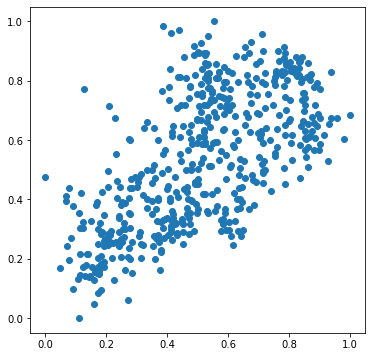

In [53]:
plt.figure(figsize=[6,6])
plt.scatter(df_train.cnt, df_train.temp)
plt.show()

In [56]:
# Add a constant
X_train = df_train
X_train_lm3 = sm.add_constant(X_train[['cnt']])

# Create a first fitted model
lr3 = sm.OLS(y_train, X_train_lm3).fit()

In [57]:
lr3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   temp   R-squared:                       0.414
Model:                            OLS   Adj. R-squared:                  0.413
Method:                 Least Squares   F-statistic:                     359.1
Date:                Wed, 14 Sep 2022   Prob (F-statistic):           5.80e-61
Time:                        21:47:22   Log-Likelihood:                -1609.7
No. Observations:                 510   AIC:                             3223.
Df Residuals:                     508   BIC:                             3232.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.1663      0.630     14.554      0.000       7.929      10.404
cnt           21.2923      1.124     18.949      0.000      19.085      23.500
==============================================================================
Omnibus:                       21.100   Durbin-Watson:                   2.179
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               19.109
Skew:                           0.413   Prob(JB):                     7.09e-05
Kurtosis:                       2.534   Cond. No.                         5.68
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [61]:
# Add a constant
X_train = df_train
X_train_lm4 = sm.add_constant(X_train[['cnt', 'temp']])

# Create a first fitted model
lr4 = sm.OLS(y_train, X_train_lm4).fit()
lr4.summary()

C:\Users\vvenugop\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   temp   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 7.846e+32
Date:                Wed, 14 Sep 2022   Prob (F-statistic):               0.00
Time:                        21:50:06   Log-Likelihood:                 16157.
No. Observations:                 510   AIC:                        -3.231e+04
Df Residuals:                     507   BIC:                        -3.229e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.4243   5.18e-16   4.68e+15      0.000       2.424       2.424
cnt        -9.159e-15   1.09e-15     -8.394      0.000   -1.13e-14   -7.02e-15
temp          32.9040   1.09e-15   3.03e+16      0.000      32.904      32.904
==============================================================================
Omnibus:                       36.691   Durbin-Watson:                   1.635
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               16.968
Skew:                           0.241   Prob(JB):                     0.000207
Kurtosis:                       2.248   Cond. No.                         9.37
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [62]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [63]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

C:\Users\vvenugop\Anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,Features,VIF
8,2018,inf
9,2019,inf
10,1,inf
11,2,inf
12,3,inf
13,4,inf
7,cnt,5.70
4,temp,4.87
0,mnth,3.90
5,hum,1.93


In [64]:
# Dropping highly correlated variables and insignificant variables

X = X_train.drop('mnth', 1,)

C:\Users\vvenugop\AppData\Local\Temp/ipykernel_38704/2865177664.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X = X_train.drop('mnth', 1,)


In [67]:
X_train_lm = sm.add_constant(X)

lr_2 = sm.OLS(y_train, X_train_lm).fit()

C:\Users\vvenugop\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [68]:
lr_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   temp   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.801e+29
Date:                Wed, 14 Sep 2022   Prob (F-statistic):               0.00
Time:                        21:55:00   Log-Likelihood:                 14650.
No. Observations:                 510   AIC:                        -2.928e+04
Df Residuals:                     498   BIC:                        -2.922e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.3853   1.84e-14   7.51e+13      0.000       1.385       1.385
weekday    -1.145e-14   1.85e-15     -6.194      0.000   -1.51e-14   -7.82e-15
workingday -6.883e-15   7.86e-15     -0.875      0.382   -2.23e-14    8.57e-15
weathersit  2.043e-14   1.83e-14      1.118      0.264   -1.55e-14    5.63e-14
temp          32.9040   3.55e-14   9.27e+14      0.000      32.904      32.904
hum        -1.193e-15   3.55e-16     -3.365      0.001   -1.89e-15   -4.97e-16
windspeed   3.886e-16   7.85e-16      0.495      0.621   -1.15e-15    1.93e-15
cnt        -1.599e-14   3.86e-14     -0.414      0.679   -9.19e-14    5.99e-14
2018           0.6927   9.01e-15   7.68e+13      0.000       0.693       0.693
2019           0.6927   1.25e-14   5.53e+13      0.000       0.693       0.693
1              0.3463   8.95e-15   3.87e+13      0.000       0.346       0.346
2              0.3463   8.92e-15   3.88e+13      0.000       0.346       0.346
3              0.3463   1.21e-14   2.87e+13      0.000       0.346       0.346
4              0.3463   9.15e-15   3.78e+13      0.000       0.346       0.346
==============================================================================
Omnibus:                        8.325   Durbin-Watson:                   0.253
Prob(Omnibus):                  0.016   Jarque-Bera (JB):                8.119
Skew:                          -0.274   Prob(JB):                       0.0173
Kurtosis:                       2.712   Cond. No.                     3.88e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.47e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [69]:
X = X_train.drop('weathersit', 1,)
X = X_train.drop('windspeed', 1,)
X_train_lm = sm.add_constant(X)

lr_3 = sm.OLS(y_train, X_train_lm).fit()

C:\Users\vvenugop\AppData\Local\Temp/ipykernel_38704/1776336440.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X = X_train.drop('weathersit', 1,)
C:\Users\vvenugop\AppData\Local\Temp/ipykernel_38704/1776336440.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X = X_train.drop('windspeed', 1,)
C:\Users\vvenugop\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [70]:
lr_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   temp   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 6.263e+30
Date:                Wed, 14 Sep 2022   Prob (F-statistic):               0.00
Time:                        21:56:50   Log-Likelihood:                 15364.
No. Observations:                 510   AIC:                        -3.070e+04
Df Residuals:                     498   BIC:                        -3.065e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.3853   3.94e-15   3.52e+14      0.000       1.385       1.385
mnth        2.165e-15    5.1e-16      4.248      0.000    1.16e-15    3.17e-15
weekday    -1.221e-15   4.56e-16     -2.681      0.008   -2.12e-15   -3.26e-16
workingday  1.599e-14   1.94e-15      8.247      0.000    1.22e-14    1.98e-14
weathersit  -1.91e-14   4.49e-15     -4.249      0.000   -2.79e-14   -1.03e-14
temp          32.9040   8.62e-15   3.82e+15      0.000      32.904      32.904
hum         6.592e-16   8.31e-17      7.933      0.000    4.96e-16    8.22e-16
cnt        -8.271e-15   9.08e-15     -0.911      0.363   -2.61e-14    9.56e-15
2018           0.6927   2.12e-15   3.27e+14      0.000       0.693       0.693
2019           0.6927   2.68e-15   2.58e+14      0.000       0.693       0.693
1              0.3463   2.49e-15   1.39e+14      0.000       0.346       0.346
2              0.3463   2.08e-15   1.66e+14      0.000       0.346       0.346
3              0.3463   3.09e-15   1.12e+14      0.000       0.346       0.346
4              0.3463    3.3e-15   1.05e+14      0.000       0.346       0.346
==============================================================================
Omnibus:                        0.979   Durbin-Watson:                   1.963
Prob(Omnibus):                  0.613   Jarque-Bera (JB):                1.046
Skew:                           0.050   Prob(JB):                        0.593
Kurtosis:                       2.802   Cond. No.                     3.62e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.65e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [76]:
X = X_train.drop(['weekday', 'workingday', 'mnth', 'hum', 'weathersit', 'windspeed'], 1,)
X_train_lm = sm.add_constant(X)
lr_4 = sm.OLS(y_train, X_train_lm).fit()
lr_4.summary()

C:\Users\vvenugop\AppData\Local\Temp/ipykernel_38704/927901060.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X = X_train.drop(['weekday', 'workingday', 'mnth', 'hum', 'weathersit', 'windspeed'], 1,)
C:\Users\vvenugop\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   temp   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.137e+31
Date:                Wed, 14 Sep 2022   Prob (F-statistic):               0.00
Time:                        22:03:08   Log-Likelihood:                 15359.
No. Observations:                 510   AIC:                        -3.070e+04
Df Residuals:                     503   BIC:                        -3.067e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.3853   2.49e-15   5.57e+14      0.000       1.385       1.385
temp          32.9040   8.27e-15   3.98e+15      0.000      32.904      32.904
cnt         9.437e-15   7.93e-15      1.191      0.234   -6.13e-15     2.5e-14
2018           0.6927   1.43e-15   4.85e+14      0.000       0.693       0.693
2019           0.6927   2.12e-15   3.27e+14      0.000       0.693       0.693
1              0.3463      2e-15   1.74e+14      0.000       0.346       0.346
2              0.3463   1.89e-15   1.83e+14      0.000       0.346       0.346
3              0.3463   2.92e-15   1.19e+14      0.000       0.346       0.346
4              0.3463   1.75e-15   1.98e+14      0.000       0.346       0.346
==============================================================================
Omnibus:                       26.159   Durbin-Watson:                   0.325
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.894
Skew:                          -0.548   Prob(JB):                     8.77e-07
Kurtosis:                       2.663   Cond. No.                     9.58e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.29e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [79]:
# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

C:\Users\vvenugop\Anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,Features,VIF
2,2018,inf
3,2019,inf
4,1,inf
5,2,inf
6,3,inf
7,4,inf
0,temp,4.31
1,cnt,3.91


In [87]:
y_train_pred = lr_4.predict(X_train_lm)

C:\Users\vvenugop\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Errors')

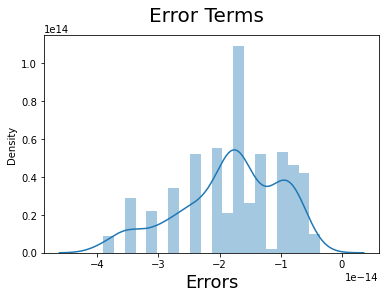

In [88]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

In [ ]:
## Model Evaluation

Text(0, 0.5, 'y_train_pred')

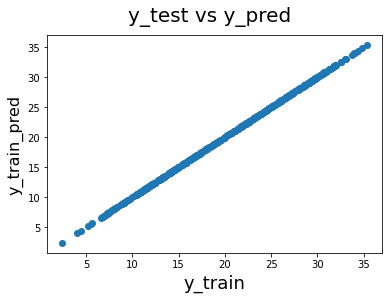

In [104]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_train,y_train_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_train', fontsize=18)                          # X-label
plt.ylabel('y_train_pred', fontsize=16)                          # Y-label

In [106]:
y_test = df_train.pop('temp')
X_test = df_train

In [111]:
# Now let's use our model to make predictions.
X_test_new = sm.add_constant(X)
lm = sm.OLS(y_train, X_test_new).fit()
y_pred = lm.predict(X_test_new)

Text(0, 0.5, 'y_pred')

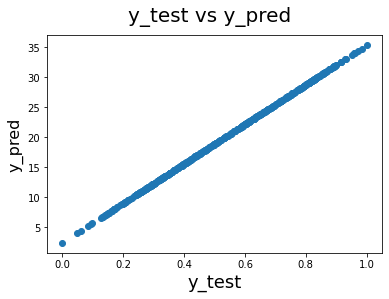

In [112]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label